In [1]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# An inefficient implementation for convolution with valid padding
# The size of kernel is assumed to be odd

def ineff_conv(X, k):
    
    ksz = k.shape[0]
    assert ksz%2 == 1
    hksz = (ksz-1) // 2
    
    # The shape of output will be smaller due to valid padding
    Y = np.zeros([X.shape[0]-ksz+1, X.shape[1]-ksz+1])
    
    # Loop over pixels
    for yi in range(Y.shape[0]):
        for yj in range(Y.shape[1]):
            xi, xj = yi+hksz, yj+hksz
            Y[yi,yj] = np.sum(X[xi-hksz:xi+hksz+1,xj-hksz:xj+hksz+1] * k[::-1,::-1])
    
    return Y

In [3]:
# An efficient implementation for convolution with valid padding
# The size of kernel is assumed to be odd
# Instead of looping over pixels, here we loop over elements in the kernel

def eff_conv(X, k):
    ksz = k.shape[0]
    assert ksz%2 == 1
    hksz = (ksz-1) // 2
    
    # The shape of output will be smaller due to valid padding
    yh, yw = X.shape[0]-ksz+1, X.shape[1]-ksz+1
    Y = np.zeros([yh, yw])
    k = k[::-1,::-1]
    
    # Loop over elements in the kernel
    for i in range(ksz):
        for j in range(ksz):
            Y[:,:] = Y[:,:] + k[i,j] * X[i:i+yh,j:j+yw]
            
    return Y

In [4]:
# Define a kernel
k = np.array([[1/8,1/8,1/8],[1/8,0,1/8],[1/8,1/8,1/8]])
# k = np.random.random([5,5])
print(k)

[[ 0.125  0.125  0.125]
 [ 0.125  0.     0.125]
 [ 0.125  0.125  0.125]]


<IPython.core.display.Javascript object>


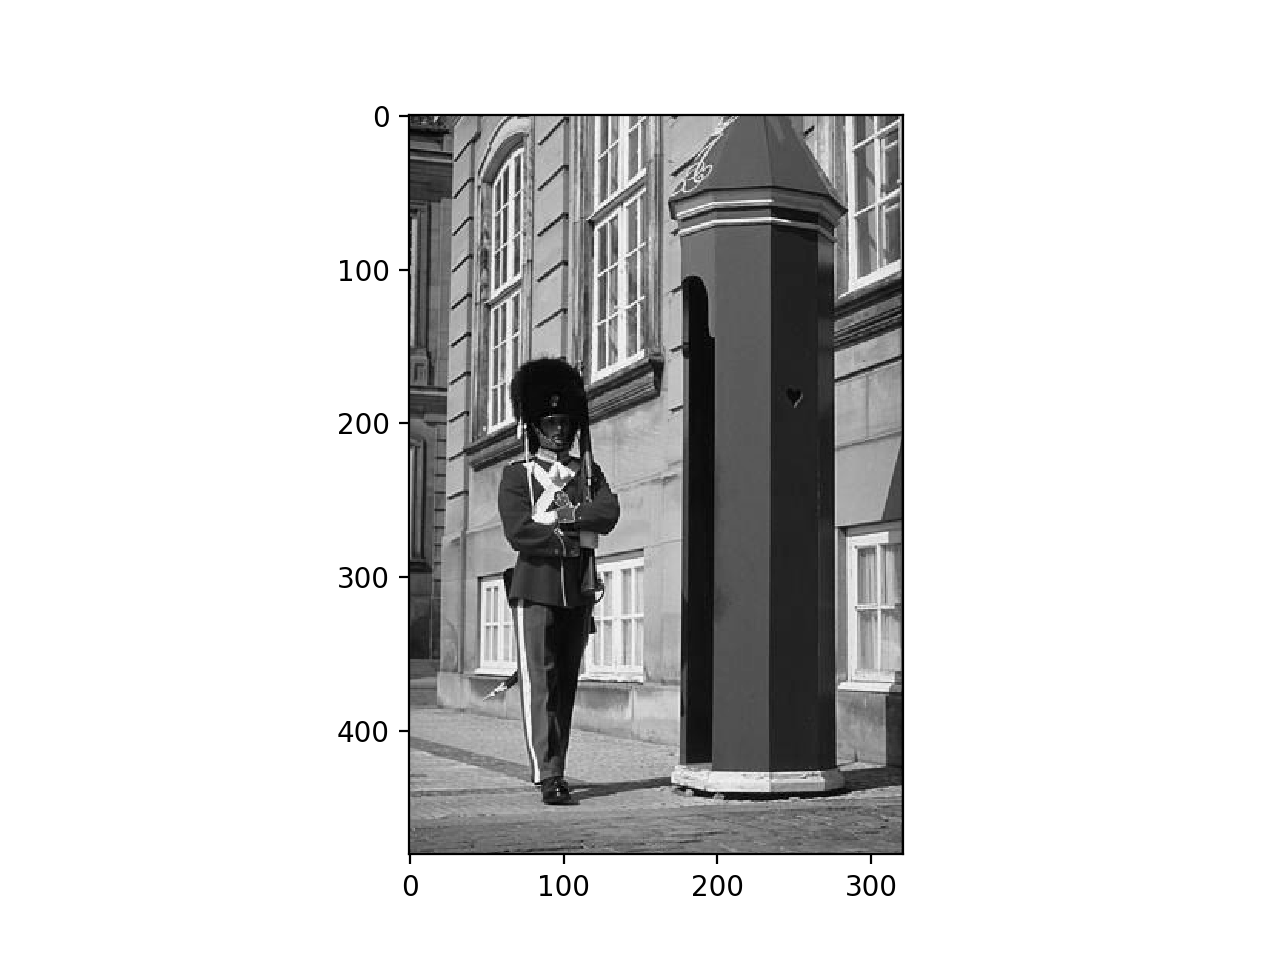

In [5]:
# Load an image
img = np.float32(imread('example.jpg'))/255.
plt.imshow(img, cmap='gray')

In [6]:
# Test

from scipy.signal import convolve2d as conv2

y1 = ineff_conv(img, k)
y2 = eff_conv(img, k)
y3 = conv2(img, k, mode='valid')

print(np.mean(np.abs(y1-y3)), np.mean(np.abs(y2-y3)))

0.0 0.0


In [7]:
import time

# Timing function
def timer(func, args):
    start = time.time()
    func(*args)
    print(time.time()-start)

# Test running time
timer(ineff_conv, (img,k))
timer(eff_conv, (img,k))
timer(conv2, (img,k,'valid'))

0.8393187522888184
0.0029859542846679688
0.00499725341796875
